# L'algoritmo di Deutsch-Joza

L'algoritmo di Deutsch-Jozsa generalizza l'algoritmo di Deutsch alle funzioni del tipo

$$
f:\{0,1\}^n \to \{0,1\}
$$

dando come output $0$ se la funzione è costante, $1$ se la funzione è bilanciata. Per ipotesi, la funzione deve essere o bilanciata, o costante: definiamo questo come un problema con promessa, ossia con un'ipotesi che assumiamo come vera, sull'input.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from BoredQiskit import FastQiskit as fq
from BoredQiskit import FastOracles as fo

Ho deciso di creare un modulo dedicato alla creazione degli oracoli. La funzione `geeneral_boolean_oracle` da FastOracles presenta questa definizione

```py
def general_boolean_oracle(n: int, sol: list[str]):
    """
    generates a general boolean oracle of size qubits given the list
    of inputs for which it should output 1
    """
    xr = QuantumRegister(n,'x')
    yr = QuantumRegister(1,'out')
    qc = QuantumCircuit(xr, yr)    
    
    for s  in sol:
        for i in range(n):
            if s[i]=='0':
                qc.x(xr[i])
        qc.mcx(xr,yr[0])
        for i in range(n):
            if s[i]=='0':
                qc.x(xr[i])
    qc = qc.to_gate(label='  oracle  ')
    return qc    
```

Vediamo adesso il circuito dell'algoritmo di Deutsch Jozsa, generalizzato a $n$ qubit di input.

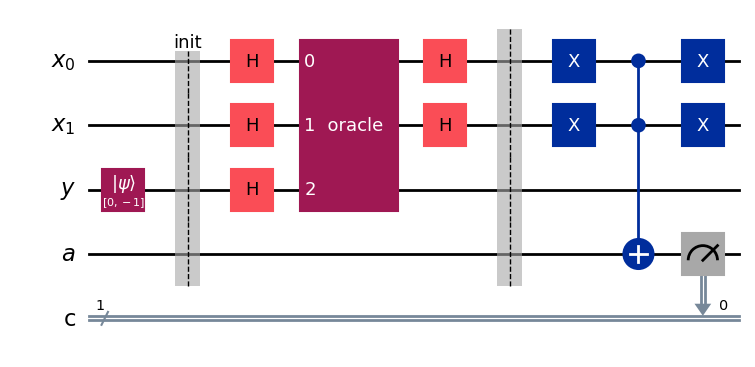

In [179]:
def deutsch_jozsa(size: int, sol: list):
    U = fo.general_boolean_oracle(size, sol)
    qx = QuantumRegister(size, 'x')
    qy = QuantumRegister(1, 'y')
    a = QuantumRegister(1, 'a')
    c = ClassicalRegister(1, 'c')

    qc = QuantumCircuit(qx,qy,a,c)
    qc.initialize([0,-1], qy)
    qc.barrier(label='init')

    qc.h(qx)
    qc.h(qy)
    qc = qc.compose(U)

    qc.h(range(size))
    qc.barrier()

    # optimized measure. we could measure every qubit, but that would affect
    # the asymptotical depth of the circuit in a linear way.
    qc.x(range(size))
    qc.mcx(list(range(size)), a)
    qc.x(range(size))
    qc.measure(a, 0)
    return qc

qc = deutsch_jozsa(2, ['00','11'])
qc.draw('mpl')

In [182]:
counts = fq.run(qc,1)
counts= str(counts.keys()).count('1')

if counts:
    print("La funzione è costante!")
else:
    print("La funzione è bilanciata!")

La funzione è bilanciata!


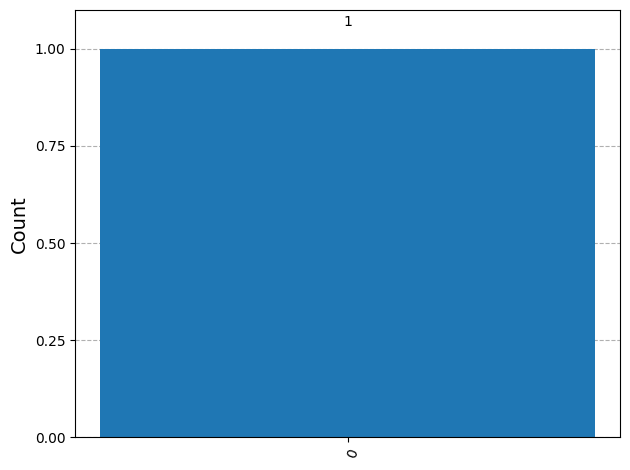

In [4]:
plot_histogram(counts)